In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Define the Sequential model
model = models.Sequential()

# Input layer (assuming input shape is 64x64 RGB images; adjust as needed)
model.add(layers.Input(shape=(64, 64, 3)))

# Add 5 Conv2D layers, each followed by MaxPooling and BatchNormalization
for i in range(1, 6):
    model.add(layers.Conv2D(
        filters=32 * i,
        kernel_size=(3, 3),
        activation='relu',
        padding='same'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.BatchNormalization())

# Flatten the output before Dense layers
model.add(layers.Flatten())

# First Dense layer with L2 regularization and Dropout
model.add(layers.Dense(
    units=128,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(layers.Dropout(0.5))

# Second Dense layer with L2 regularization and Dropout
model.add(layers.Dense(
    units=64,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(layers.Dropout(0.5))

# Output layer with Softmax activation for multi-class classification
model.add(layers.Dense(
    units=10,  # Adjust the number of classes as needed
    activation='softmax'
))

# Compile the model (optional, for completeness)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 160)           │         184,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 160)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 2, 2, 160)           │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,2

 Total params: 462,858 (1.77 MB)

 Trainable params: 461,898 (1.76 MB)

 Non-trainable params: 960 (3.75 KB)

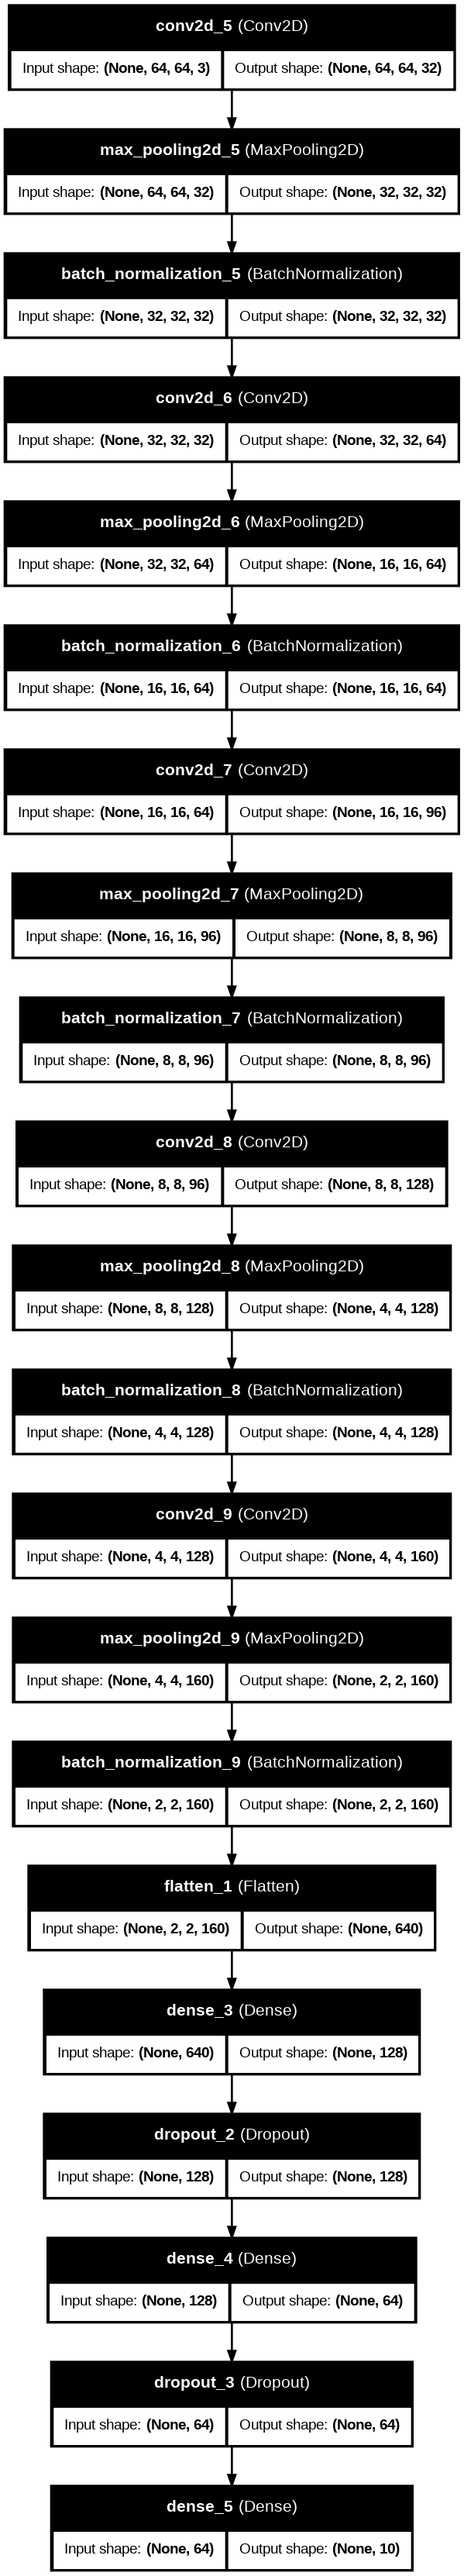

In [11]:
from tensorflow.keras.utils import plot_model

# Generate and save the model diagram
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)


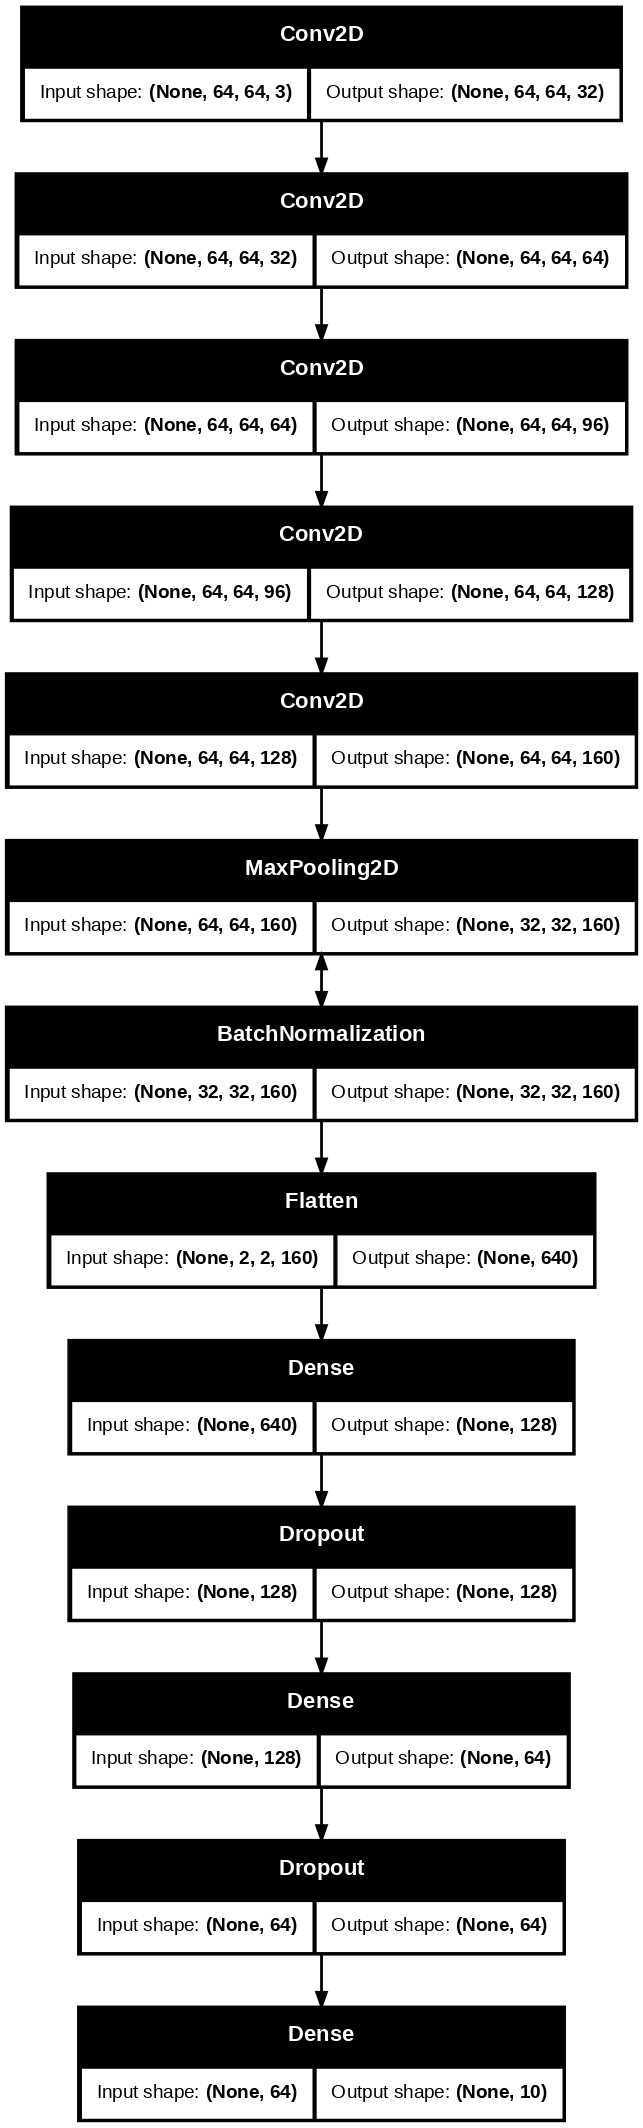

In [12]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import plot_model

# Define a Sequential model
model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    *[layers.Conv2D(32 * i, (3, 3), activation='relu', padding='same') for i in range(1, 6)],
    *[layers.MaxPooling2D((2, 2)), layers.BatchNormalization()] * 5,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Plot model vertically with compact layout
plot_model(
    model,
    to_file='model_vertical.png',
    show_shapes=True,
    show_layer_names=False,
    dpi=100,
    rankdir='TB'
)
